In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import pandas as pd
import math
from collections import Counter
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines


In [2]:
import pickle 

# Load multiple variables from the file
with open('Results.pkl', 'rb') as file:
    data = pickle.load(file)

In [3]:
num_rlz = len(data['RepairClass_dict']['Col'])

### Repair Class Distributions
e.g., the repair class distribution for column

In [4]:
RC = data['RepairClass_dict']

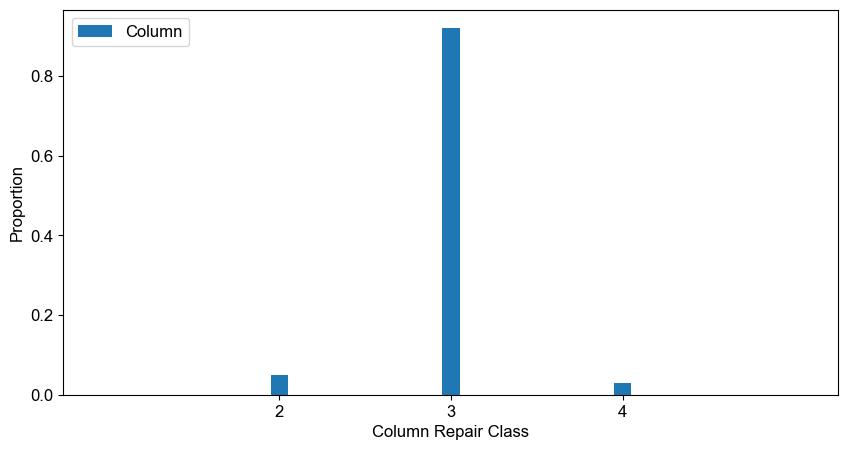

In [5]:

prop_col = [RC['Col'].count(i)/num_rlz for i in range(1,6)]

plt.figure(figsize = (10,5))
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12
bar_width = .1

index = np.arange(1,6)
position1 = index

bars1 = plt.bar(position1, prop_col, bar_width, label='Column')

plt.legend(loc = 'upper left')

plt.xticks(range(min(RC['Col']), max(RC['Col']) + 1))


plt.xlabel('Column Repair Class')
plt.ylabel('Proportion')


plt.show()

### Initial response phase Functionality state

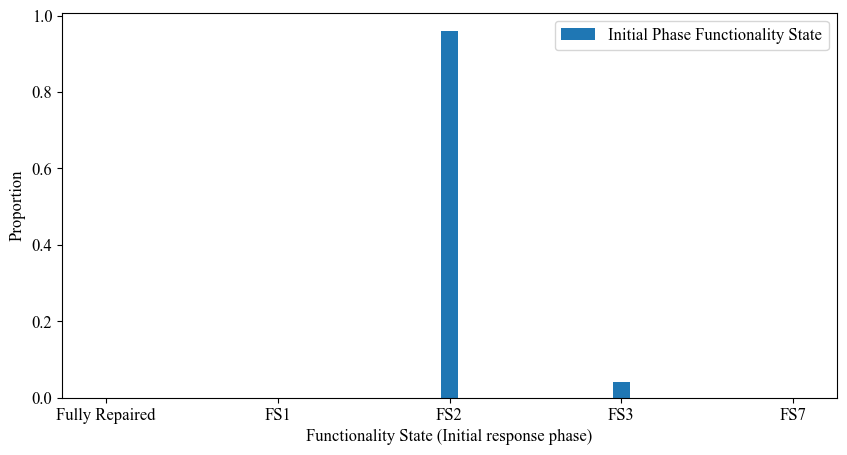

In [6]:
prop_FS_initial = [data['FS_rlz'].count(i)/num_rlz for i in [0,1,2,3,7]]
categories = ['Fully Repaired', 'FS1', 'FS2', 'FS3', 'FS7']

plt.figure(figsize = (10,5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12
bar_width = .1

position1 = index
bars1 = plt.bar(position1, prop_FS_initial, bar_width, label='Initial Phase Functionality State')
plt.xlabel('Functionality State (Initial response phase)')
plt.ylabel('Proportion')
plt.xticks(index, categories,rotation=0)
plt.legend(loc = 'best')
#plt.savefig("Figures/FS_PMF_Initial_SEE.jpg") 

plt.show()

### Reopening phase Functionality state

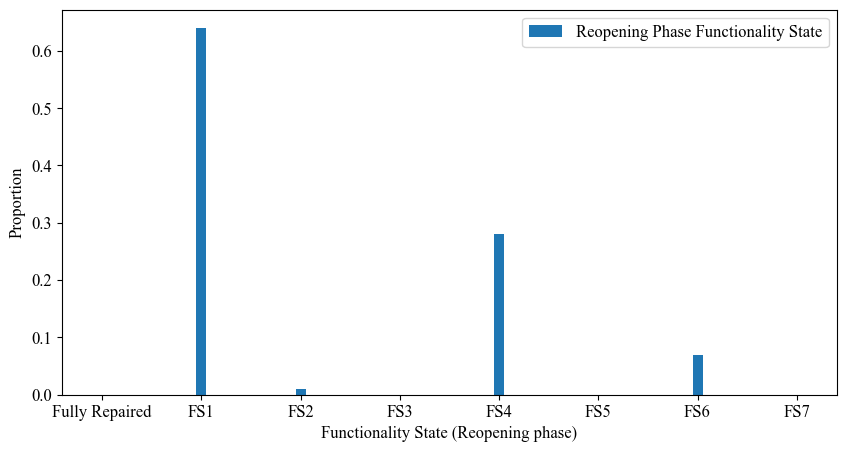

In [7]:
prop_FS_reopening = [data['FS_rlz_Reopening'].count(i)/num_rlz for i in range(0,8)]
categories = ['Fully Repaired', 'FS1', 'FS2', 'FS3', 'FS4', 'FS5', 'FS6', 'FS7']
plt.figure(figsize = (10,5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12
bar_width = .1

index = np.arange(len(categories))
position = index

bars = plt.bar(position, prop_FS_reopening, bar_width, label='Reopening Phase Functionality State')
plt.xlabel('Functionality State (Reopening phase)')
plt.ylabel('Proportion')
plt.xticks(index, categories)
plt.legend(loc = 'best')
#plt.savefig("Figures/FS_PMF_Reopening_SEE.jpg") 

plt.show()

### closed lane number at initial phase

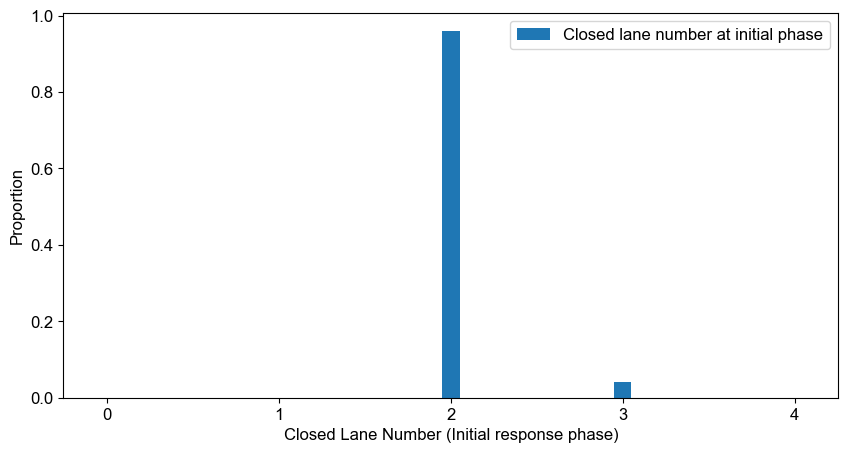

In [8]:
prop_closedlane_initial = [data['ClosedLaneNum_Initial'].count(i)/num_rlz for i in [0,1,2,3,4]]

categories = ['0', '1', '2', '3', '4']

plt.figure(figsize = (10,5))
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12
bar_width = .1

index = np.arange(len(categories))
position = index + bar_width * 0

bars1 = plt.bar(position, prop_closedlane_initial, bar_width, label='Closed lane number at initial phase')

plt.xlabel('Closed Lane Number (Initial response phase)')
plt.ylabel('Proportion')
plt.xticks(index, categories,rotation=0)
plt.legend(loc = 'best')
#plt.savefig("Figures/ClosedLaneNum_Initial_SEE.jpg") 

plt.show()

### Empirical CCDF of total time delay

In [9]:
def empirical_ccdf(samplevalue, assessedtimes):
    ccdf_list = [None]*len(assessedtimes)
    for idx,val in enumerate(assessedtimes):
        ccdf_list[idx] = (np.sum(np.array(samplevalue) >= val))/len(samplevalue)
    return ccdf_list


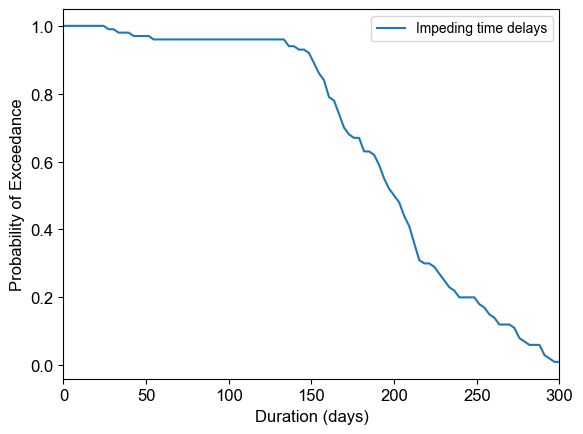

In [10]:
assessedtimes = np.linspace(0,300,num=100)
TotalDelay = data['IF_sum_list']
ccdf = empirical_ccdf(TotalDelay, assessedtimes)

plt.plot(assessedtimes,ccdf, label = 'Impeding time delays')
plt.xlabel('Duration (days)')
plt.ylabel('Probability of Exceedance')
plt.xlim([0,300])
plt.legend(loc = 'upper right', fontsize = 10)
#plt.grid(True)
plt.show()




###  Disagg: Impeding factors (median）

In [11]:
median_IniInsp = np.median(data['IF_sampled_list']['IniInsp'])
median_InDepInsp = np.median(data['IF_sampled_list']['InDepInsp'])
median_Financing = np.median(data['IF_sampled_list']['Financing'])
median_Design = np.median(data['IF_sampled_list']['Design'])
median_Permitting = np.median(data['IF_sampled_list']['Permitting'])
median_Contractor = np.median(data['IF_sampled_list']['Contractor'])
median_TotalDelay = np.median(data['IF_sum_list'])

std_Design = np.std(data['IF_sampled_list']['Design'])

print(median_IniInsp)
print(median_InDepInsp)
print(median_Financing)
print(median_Design)
print(median_Permitting)
print(median_Contractor)
print(median_TotalDelay)
#print(std_Design)

0.1359484738450066
4.956151491921327
42.863996763972025
42.08786568932399
0.0
133.51105208944688
200.33509169657287


###  Disagg: repair durations (median）

In [12]:
Col_list = []
Seat_list = []
Super_list = []
Fnd_list = []
AbPile_list = []
Backwall_list = []
Bearing_list = []
Key_list = []
ApproSlab_list = []
JointSeal_list = []


for data_each in data['RepDur_sampled_comp_rlz']:
    if data_each != 'Complete':
        Col_list.append(data_each['Col'])
        Seat_list.append(data_each['Seat_ab'])
        Super_list.append(data_each['Super'])
        Fnd_list.append(data_each['ColFnd'])
        AbPile_list.append(data_each['AbFnd'])
        Backwall_list.append(data_each['Backwall'])
        Bearing_list.append(data_each['Bearing_ab'])
        Key_list.append(data_each['Key_ab'])
        ApproSlab_list.append(data_each['ApproSlab'])
        JointSeal_list.append(data_each['JointSeal_ab'])
        
print(f"Median Rep Dur for Col: {np.median(Col_list)}")
print(f"Median Rep Dur for Seat_ab: {np.median(Seat_list)}")
print(f"Median Rep Dur for Super: {np.median(Super_list)}")
print(f"Median Rep Dur for ColFnd: {np.median(Fnd_list)}")
print(f"Median Rep Dur for AbFnd: {np.median(AbPile_list)}")
print(f"Median Rep Dur for Backwall: {np.median(Backwall_list)}")
print(f"Median Rep Dur for Bearing_ab: {np.median(Bearing_list)}")
print(f"Median Rep Dur for Key_ab: {np.median(Key_list)}")
print(f"Median Rep Dur for ApproSlab: {np.median(ApproSlab_list)}")
print(f"Median Rep Dur for JointSeal_ab: {np.median(JointSeal_list)}")

Median Rep Dur for Col: 11.541581878090389
Median Rep Dur for Seat_ab: 0.00010073367576064068
Median Rep Dur for Super: 0.0
Median Rep Dur for ColFnd: 0.0
Median Rep Dur for AbFnd: 7.136406056290846e-05
Median Rep Dur for Backwall: 0.0
Median Rep Dur for Bearing_ab: 0.00011360678919972321
Median Rep Dur for Key_ab: 2.671812932950566
Median Rep Dur for ApproSlab: 0.0
Median Rep Dur for JointSeal_ab: 3.453119537934285


### Empirical CCDF of total repair/replacement duration

In [13]:
def empirical_ccdf(samplevalue, assessedtimes):
    ccdf_list = [None]*len(assessedtimes)
    for idx,val in enumerate(assessedtimes):
        ccdf_list[idx] = (np.sum(np.array(samplevalue) >= val))/len(samplevalue)
    return ccdf_list


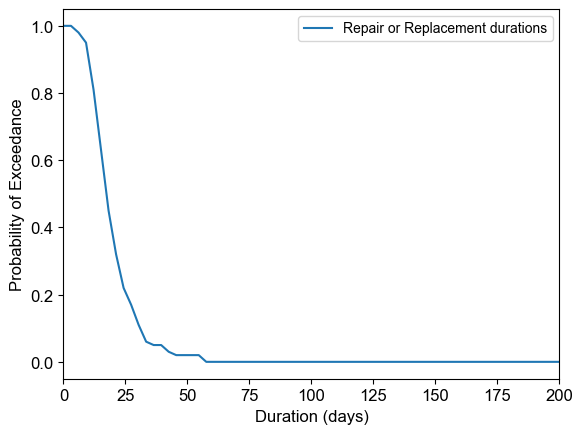

In [14]:
TotalRep = data['RepDur_sum_rlz']
assessedtimes = np.linspace(0,300,num=100)
ccdf_vals = empirical_ccdf(TotalRep,assessedtimes)


plt.plot(assessedtimes,ccdf_vals, label = 'Repair or Replacement durations')

plt.xlabel('Duration (days)')
plt.ylabel('Probability of Exceedance')
plt.xlim([0,200])
plt.legend(loc = 'upper right', fontsize = 10)
plt.show()
